# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
from scipy.stats import linregress
temp_units = "metric"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | ambovombe
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | antsohihy
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ilanskiy
Processing Record 16 of Set 1 | tezu
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | dwarka
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | voyvozh
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | carnarvon
Processing Record 24 of Set 1 | ribeira grande
Processing Record 25 of Set

Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | labuhan
Processing Record 44 of Set 4 | lamballe
Processing Record 45 of Set 4 | beyneu
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | paulo afonso
Processing Record 48 of Set 4 | zelenoborsk
Processing Record 49 of Set 4 | anar darreh
Processing Record 1 of Set 5 | zhangye
Processing Record 2 of Set 5 | tyukhtet
Processing Record 3 of Set 5 | kapustin yar
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | brae
Processing Record 7 of Set 5 | puerto ayora
City not found. Skipping...
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | hofn
Processing Record 10 of Set 5 | caborca
Processing Record 11 of Set 5 | kidal
Processing Record 12 of Set 5 | talnakh
Processing Record 13 of Set 5 | nokaneng
Processing Record 14 of Set 5 | faanui
Processing Record 15 of Set 5 | necoc

Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | bokaro
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | flin flon
Processing Record 37 of Set 8 | pineville
Processing Record 38 of Set 8 | pochutla
Processing Record 39 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 8 | faya
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 8 | itarema
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | guliston
City not found. Skipping...
Processing Record 44 of Set 8 | souillac
Processing Record 45 of Set 8 | biratnagar
Processing Record 46 of Set 8 | tjome
Processing Record 47 of Set 8 | jurado
Processing Record 48 of Set 8 | sompeta
Processing Record 49 of Set 8 | tateyama
Processing Record 1 of Set 9 | anekal
Processing Record 2 of Set 9 | baghdad
Processing Record 3 of Set 9 | bindura
Processing Record 4 of Set 9 | fort nelson
Processing Record 5 of Set 9 | shieli
Process

Processing Record 26 of Set 12 | jurm
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": cities,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country":countries,
    "Date":dates
}
# Use .transpose function to drop the Nan value 
weather_data = pd.DataFrame.from_dict(weather_dict,orient='index').transpose()

weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,18.56,91,86,2.26,UY,1615870517
1,jamestown,42.097,-79.2353,1.67,34,40,3.51,US,1615870518
2,bambous virieux,-20.2567,57.4061,28.89,74,75,5.66,MU,1615870519
3,butaritari,3.0707,172.79,27.29,79,95,5.99,KI,1615870441
4,bluff,-46.6,168.333,12.78,67,92,6.71,NZ,1615870520


In [13]:
#Export DataFrame to CSV File
weather_data.to_csv("weather_data1.csv")

In [14]:
cities = pd.read_csv("weather_data1.csv", encoding="utf-8")
cities.head()

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,chuy,-33.6971,-53.4616,18.56,91.0,86.0,2.26,UY,1.615871e+09
1,1,jamestown,42.0970,-79.2353,1.67,34.0,40.0,3.51,US,1.615871e+09
2,2,bambous virieux,-20.2567,57.4061,28.89,74.0,75.0,5.66,MU,1.615871e+09
3,3,butaritari,3.0707,172.7902,27.29,79.0,95.0,5.99,KI,1.615870e+09
4,4,bluff,-46.6000,168.3333,12.78,67.0,92.0,6.71,NZ,1.615871e+09


In [15]:
cities.dtypes

Unnamed: 0      int64
City           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

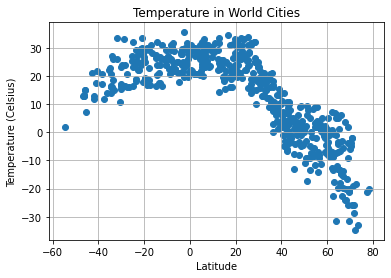

In [16]:
#Temperature (F) vs. Latitude
plt.scatter(cities["Latitude"], cities["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

###### # The code is to plot a scatter plot that shows the relationship between each city's latitude and its' maximum temperature. It can be noticed that when the city is located more close to equator, the higher the tempurature the city gets. 

## Latitude vs. Humidity Plot

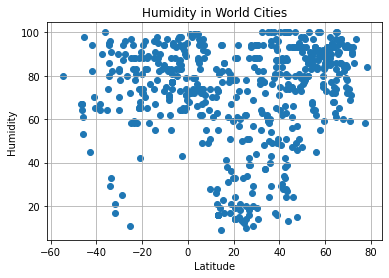

In [17]:
# Build a scatter plot for each data type
#Humidity (%) vs. Latitude

plt.scatter(cities["Latitude"], cities["Humidity"], marker="o")


# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

###### # The code is to plot a scatter plot that shows the relationship between each city's latitude and its' humidity. It can be noticed that no matter how close the city is located to the equator, it is hard to tell the humidity would be affected by this reason. We can conclude that distance to equator has little to do with humidity. 

## Latitude vs. Cloudiness Plot

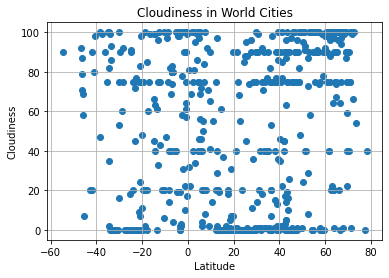

In [18]:
#Cloudiness (%) vs. Latitude
plt.scatter(cities["Latitude"], cities["Cloudiness"], marker="o")


# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

###### # The code is to plot a scatter plot that shows the relationship between each city's latitude and its' cloudiness. It can be noticed that no matter how close the city is located to the equator, it is hard to tell the cloudiness would be affected by this reason. We can conclude that distance to equator has little to do with  cloudiness. 

## Latitude vs. Wind Speed Plot

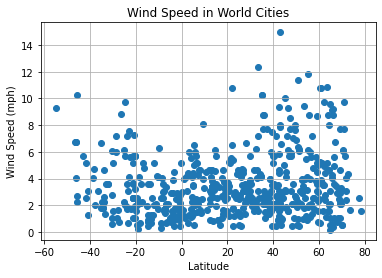

In [19]:
#Wind Speed (mph) vs. Latitude

plt.scatter(cities["Latitude"], cities["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind SpeedInWorldCities.png")

# Show plot
plt.show()

###### # The code is to plot a scatter plot that shows the relationship between each city's latitude and its' wind speed. It can be noticed that no matter how close the city is located to the equator, it is hard to tell strong wind speed can be observed. We can conclude that distance to equator has little to do with wind speed it is more euqally distributed over the latitude range. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
cities["Humidity"].head()


over_h = cities.loc[cities["Humidity"] > 100 ]

print (over_h)


Empty DataFrame
Columns: [Unnamed: 0, City, Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [21]:
# convert the data type to float 
Northern_Hemisphere = cities.loc[cities["Latitude"]>= 0,:]


#Northern_Hemisphere.reset_index(inplace=True)
print (Northern_Hemisphere)

     Unnamed: 0              City  Latitude  Longitude  Max Temp  Humidity  \
1             1         jamestown   42.0970   -79.2353      1.67      34.0   
3             3        butaritari    3.0707   172.7902     27.29      79.0   
5             5           fortuna   40.5982  -124.1573      7.22      87.0   
7             7            hasaki   35.7333   140.8333     21.11      40.0   
9             9       provideniya   64.3833  -173.3000    -12.00      72.0   
..          ...               ...       ...        ...       ...       ...   
560         560             arlit   20.5113    76.2129     32.32      14.0   
561         561  praia da vitoria   55.2104    34.2951     -2.17      91.0   
562         562            kenora   26.7693    31.5021     14.00      88.0   
563         563            mehamn   48.6499   -53.1147     -5.00      93.0   
564         564          lorengau   36.8648    70.8342      8.00      49.0   

     Cloudiness  Wind Speed Country          Date  
1          

In [22]:
Northern_Hemisphere.dtypes

Unnamed: 0      int64
City           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

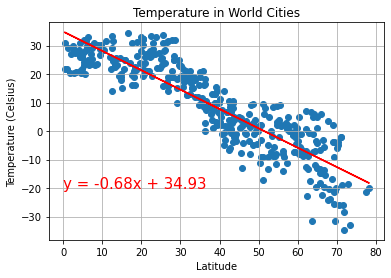

In [24]:
#Temperature (F) vs. Latitude

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Latitude"] 
y_values = Northern_Hemisphere["Max Temp"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, -20),fontsize=15,color="red")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

#print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("TemperatureInWorldCities1.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
Southern_Hemisphere = cities.loc[cities["Latitude"]< 0,:]


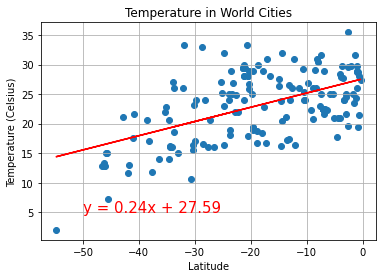

In [28]:
# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Latitude"] 
y_values = Southern_Hemisphere["Max Temp"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 5),fontsize=15,color="red")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("TemperatureInWorldCities2.png")

# Show plot
plt.show()

Both plots shows the relationship between Max Temp vs. Latitude in Northern Hemisphere and Southern Hemisphere. A clear linear relationship can be noticed that the closer the city's latitude towards the Equator, the hotter the temperature would get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

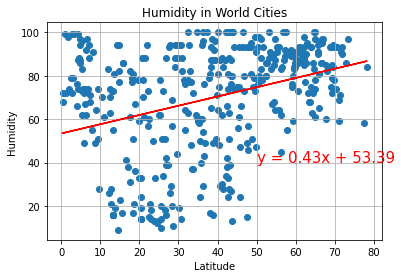

In [34]:
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Latitude"] 
y_values = Northern_Hemisphere["Humidity"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 40),fontsize=15,color="red")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("HumidityInWorldCities3.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

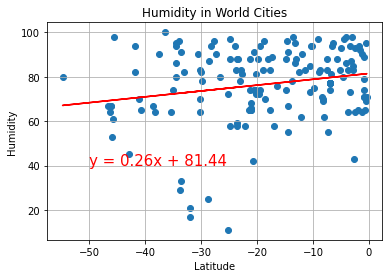

In [33]:
# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Latitude"] 
y_values = Southern_Hemisphere["Humidity"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("HumidityInWorldCities4.png")

# Show plot
plt.show()

Both plots shows the relationship between humidity vs. Latitude in Northern Hemisphere and Southern Hemisphere. Less points were gathered around the linear equation which indicated less correlation between the two variables. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

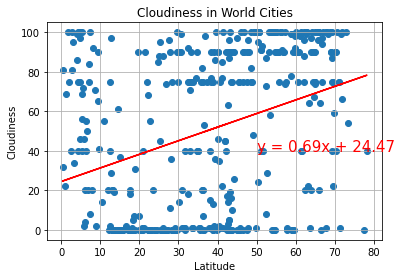

In [35]:
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Latitude"] 
y_values = Northern_Hemisphere["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 40),fontsize=15,color="red")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("CloudinessInWorldCitiesN.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

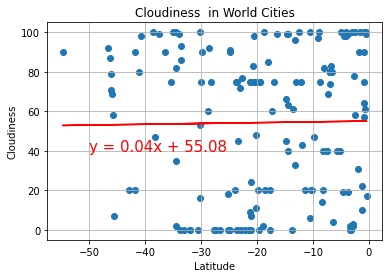

In [37]:
# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Latitude"] 
y_values = Southern_Hemisphere["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")
plt.title("Cloudiness  in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Cloudiness InWorldCities2.png")

# Show plot
plt.show()

In [ ]:
Both plots shows the relationship between cloudiness vs. Latitude in Northern Hemisphere and Southern Hemisphere. Less points were gathered around the linear equation which indicated less correlation between the two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

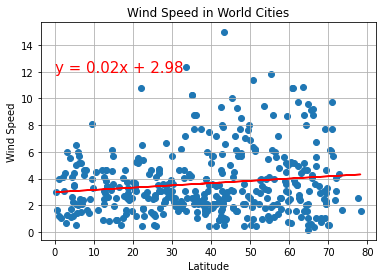

In [39]:
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Latitude"] 
y_values = Northern_Hemisphere["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 12),fontsize=15,color="red")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("WindSpeedInWorldCitiesN.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [2]:
# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Latitude"] 
y_values = Southern_Hemisphere["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 8),fontsize=15,color="red")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("WindSpeedInWorldCities2.png")

# Show plot
plt.show()

NameError: name 'Southern_Hemisphere' is not defined

Both plots shows the relationship between wind speed vs. Latitude in Northern Hemisphere and Southern Hemisphere. Less points were gathered around the linear equation which indicated less correlation between the two variables. 